In [1]:
import pandas as pd
from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, recall_score, f1_score
import numpy as np
from sklearn.metrics import confusion_matrix
from pandas.plotting import scatter_matrix
import itertools
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import mean_squared_error
from sklearn import metrics
%matplotlib inline
import scipy.stats as stats

In [2]:
from sklearn.datasets import make_blobs
X, _ = make_blobs(n_samples=100, n_features=2, centers=4, cluster_std=0.5, shuffle=True, random_state=0)

In [3]:
X

array([[ 0.72086751,  3.71347124],
       [-1.89468423,  7.96898545],
       [ 1.35678894,  4.36462484],
       [ 1.05374379,  4.49286859],
       [ 1.59141542,  4.90497725],
       [ 0.78260667,  4.15263595],
       [-1.95751686,  3.87291474],
       [-0.77354537,  7.87923564],
       [ 0.12313498,  5.27917503],
       [-1.43284669,  7.71577043],
       [-0.92819001,  7.02698199],
       [-1.74836345,  7.06307447],
       [-1.26789718,  7.25141327],
       [-0.98661744,  7.74968685],
       [-0.81984047,  7.50994722],
       [ 2.99684287,  0.22378413],
       [ 1.46870582,  1.86947425],
       [-0.33533163,  3.390122  ],
       [-1.86407034,  2.93379754],
       [ 2.62496786,  0.28025075],
       [ 2.11114739,  3.57660449],
       [-1.8219901 ,  7.61654999],
       [-1.91186205,  3.18750686],
       [ 2.28809874,  0.12954182],
       [ 0.5285368 ,  4.49723858],
       [-1.57613028,  2.58614312],
       [-0.565433  ,  3.65813966],
       [ 0.802314  ,  4.38196181],
       [ 2.79939362,

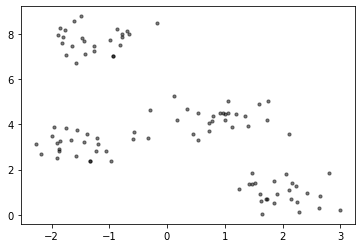

In [4]:
plt.scatter(X[:,0],X[:,1],c="black",s=10,alpha=0.5)
plt.show()

In [58]:
class ScratchKMeans():
    """
    K-meansのスクラッチ実装
    Parameters
    ----------
    n_clusters : int
      クラスタ数
    n_init : int
      中心点の初期値を何回変えて計算するか
    max_iter : int
      1回の計算で最大何イテレーションするか
    tol : float
      イテレーションを終了する基準となる中心点と重心の許容誤差
    verbose : bool
      学習過程を出力する場合はTrue
    """
    def __init__(self, n_clusters, max_iter, tol, verbose=False):
        # ハイパーパラメータを属性として記録
        self.n_clusters = n_clusters
#         self.n_init = n_init
        self.max_iter = max_iter
        self.tol = tol
        self.verbose = verbose
        self.sse_sum = np.zeros(self.max_iter)
        self.centroids = 0
    
    def centroids(self, X):
        self.idx = np.random.randint(X.shape[0], size=self.n_clusters)
        self.centroids = X[self.idx,:]
        
    def fit(self, X):
        """
        K-meansによるクラスタリングを計算
        Parameters
        ----------
        X : 次の形のndarray, shape (n_samples, n_features)
            訓練データの特徴量
        """
        
        import random
        self.sse = np.zeros(self.n_clusters)
        idx = self.idx = np.random.randint(X.shape[0], size=self.n_clusters)
        self.idx = np.random.randint(X.shape[0], size=self.n_clusters)#適当な初期値を設定
        self.centroids = X[idx,:]
        
        print("centroids:{}".format(self.centroids))
        
        for _ in range(self.max_iter):#最小のインデックスを返す
            self.idx_min = np.zeros(X.shape[0])
            
            
            for i in range(X.shape[0]):#中心の移動
                self.idx_min[i] = np.argmin(np.sum((X[i,:] - self.centroids)**2,axis=1))#セントロイドから最も小さい値のインデックスをとって来ている。
#                 np.append(idx_min, idx_min[i])
                print("index_min:{}回目：{}".format(i,self.idx_min))
    
                for n_cluster in range(self.n_clusters):
                    self.centroids[n_cluster,:] = X[self.idx_min==n_cluster,:].mean(axis=0)
                    self.sse[n_cluster] = np.sum((X[self.idx_min==n_cluster,:]-self.centroids[n_cluster,:])**2)#sseの計算
                    self.sse_sum = np.sum(self.sse)

                print(self.sse_sum)
        self.sse_total_sum = np.sum(self.sse)#全てのクラスで合計する
                
        print("self.sse_sum:{}".format(self.sse_total_sum))
        print("self.centroid:{}".format(self.centroids))
        return self.idx_min,self.sse_sum
    
        if self.verbose:
            #verboseをTrueにした際は学習過程を出力
            print()
        pass
    
    def main(self, X):
        # クラスタ数
        N_CLUSTERS = self.n_clusters
        
        # 特徴データ
        features = X
        # 正解ラベルは使わない
        # targets = dataset[1]

        # クラスタリングする
        
        pred = self.idx_min

        # 各要素をラベルごとに色付けして表示する
        for i in range(N_CLUSTERS):
            labels = features[pred == i]
            plt.scatter(labels[:, 0], labels[:, 1])

        centers = self.centroids
        plt.scatter(centers[:, 0], centers[:, 1], s=100,
                facecolors='none', edgecolors='black')

        plt.show()


In [80]:
scratch_kmeans_pred = ScratchKMeans(n_clusters=4, max_iter=10, tol=1, verbose=False)

In [81]:
# K=5
# sse_vec = np.zeros(K)
# for k in range(K):
#     SKM = ScratchKMeans(n_clusters=k+1, max_iter=10, tol=10, verbose=False)
#     inx_min, sse = SKM.fit(X)
#     sse_vec[k] = sse
# plt.plot(np.arange(1,K+1),sse_vec)
# plt.plot(np.arange(1,K+1),sse_vec,"bo")
# plt.show()

In [82]:
scratch_kmeans_pred.fit(X)

centroids:[[ 0.72144399  4.08475018]
 [-1.42525273  7.14798437]
 [ 1.35678894  4.36462484]
 [-1.6609057   3.31911046]]
index_min:0回目：[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0.]
870.2611797855423
index_min:1回目：[0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0.]
850.9000155216011
index_min:2回目：[0. 1. 2. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.

<ipython-input-58-8354b4956bf3>:58: RuntimeWarning: Mean of empty slice.
  self.centroids[n_cluster,:] = X[self.idx_min==n_cluster,:].mean(axis=0)
/Users/harakenken22/.pyenv/versions/anaconda3-2020.07/lib/python3.8/site-packages/numpy/core/_methods.py:153: RuntimeWarning: invalid value encountered in true_divide
  ret = um.true_divide(



389.9210358114578
index_min:62回目：[3. 1. 2. 2. 2. 3. 0. 1. 0. 1. 1. 1. 1. 1. 1. 3. 3. 0. 0. 3. 2. 1. 0. 3.
 0. 0. 0. 2. 3. 3. 3. 1. 3. 3. 0. 2. 1. 3. 1. 0. 2. 0. 1. 0. 0. 1. 3. 0.
 2. 0. 2. 3. 0. 0. 0. 1. 1. 3. 3. 1. 1. 3. 3. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0.]
377.35891443195385
index_min:63回目：[3. 1. 2. 2. 2. 3. 0. 1. 0. 1. 1. 1. 1. 1. 1. 3. 3. 0. 0. 3. 2. 1. 0. 3.
 0. 0. 0. 2. 3. 3. 3. 1. 3. 3. 0. 2. 1. 3. 1. 0. 2. 0. 1. 0. 0. 1. 3. 0.
 2. 0. 2. 3. 0. 0. 0. 1. 1. 3. 3. 1. 1. 3. 3. 2. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0.]
371.7226844621959
index_min:64回目：[3. 1. 2. 2. 2. 3. 0. 1. 0. 1. 1. 1. 1. 1. 1. 3. 3. 0. 0. 3. 2. 1. 0. 3.
 0. 0. 0. 2. 3. 3. 3. 1. 3. 3. 0. 2. 1. 3. 1. 0. 2. 0. 1. 0. 0. 1. 3. 0.
 2. 0. 2. 3. 0. 0. 0. 1. 1. 3. 3. 1. 1. 3. 3. 2. 3. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0

(array([3., 1., 2., 2., 2., 3., 0., 1., 0., 1., 1., 1., 1., 1., 1., 3., 3.,
        0., 0., 3., 2., 1., 0., 3., 0., 0., 0., 2., 3., 3., 3., 1., 3., 3.,
        0., 2., 1., 3., 1., 0., 2., 0., 1., 0., 0., 1., 3., 0., 2., 0., 2.,
        3., 0., 0., 0., 1., 1., 3., 3., 1., 1., 3., 3., 2., 3., 1., 0., 0.,
        3., 2., 1., 3., 2., 1., 2., 2., 0., 0., 3., 3., 3., 1., 0., 2., 3.,
        0., 3., 3., 2., 2., 2., 0., 2., 0., 0., 1., 1., 0., 1., 2.]),
 79.92621426343364)

In [83]:
scratch_kmeans_pred.centroids

array([[-1.27856682,  3.25067953],
       [-1.26811733,  7.76378266],
       [ 1.02285442,  4.35815191],
       [ 1.9000074 ,  1.18542129]])

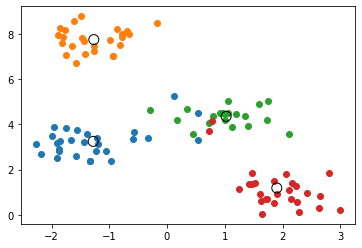

In [84]:
scratch_kmeans_pred.main(X)

【問題8】エルボー法の実装
---
>K-meansにおいて中心点の個数 𝑘 は人為的に決める必要がありますが、その判断方法としてエルボー法があります。エルボー法により中心点の個数 𝑘 を検討するためのコードを作成してください。
SSEを縦軸、クラスタ数 𝑘 を横軸にした折れ線グラフを表示します。このためにK-meansのインスタンスからはSSEを取得できるようにしてください。

参考URL:https://www.medi-08-data-06.work/entry/kmeans

centroids:[[-1.89928142  2.50466299]]
index_min:0回目：[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0.]
870.2611797855423
index_min:1回目：[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0.]
870.2611797855423
index_min:2回目：[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0

<ipython-input-58-8354b4956bf3>:58: RuntimeWarning: Mean of empty slice.
  self.centroids[n_cluster,:] = X[self.idx_min==n_cluster,:].mean(axis=0)



index_min:32回目：[0. 1. 0. 0. 0. 0. 0. 1. 0. 1. 1. 1. 1. 1. 1. 0. 0. 0. 0. 0. 0. 1. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0.]
719.9909565991727
index_min:33回目：[0. 1. 0. 0. 0. 0. 0. 1. 0. 1. 1. 1. 1. 1. 1. 0. 0. 0. 0. 0. 0. 1. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0.]
719.9909565991727
index_min:34回目：[0. 1. 0. 0. 0. 0. 0. 1. 0. 1. 1. 1. 1. 1. 1. 0. 0. 0. 0. 0. 0. 1. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0.]


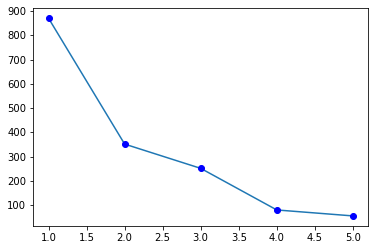

In [85]:
K=5
sse_vec = np.zeros(K)
for k in range(K):
    SKM = ScratchKMeans(n_clusters=k+1, max_iter=10, tol=10, verbose=False)
    inx_min, sse = SKM.fit(X)
    sse_vec[k] = sse
plt.plot(np.arange(1,K+1),sse_vec)
plt.plot(np.arange(1,K+1),sse_vec,"bo")
plt.show()